<h1 align="center">Project 1</h1>

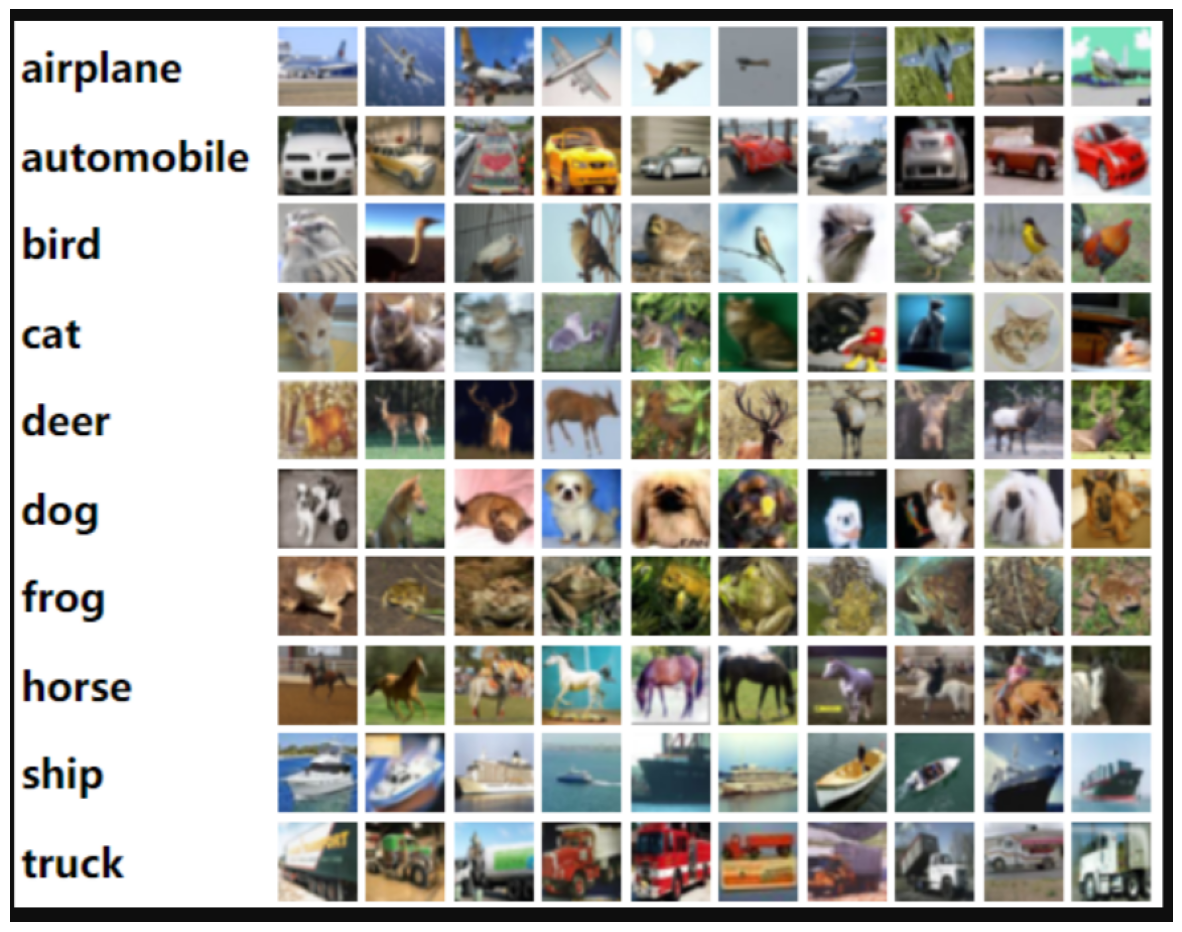

In [52]:
from PIL import Image
import matplotlib.pyplot as plt

# Absolute path to your image file
image_path = 'C:\\Users\\FAST LAPTOP\\Documents\\Deep Learning\\CPU GPU Performance test with Image classifications\\1.png'

try:
    # Load an image from a file
    image = Image.open(image_path)

    # Create a figure with a specified size
    plt.figure(figsize=(15, 15))  # You can adjust the size here (width, height)

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Turn off the axis
    plt.show()
except FileNotFoundError:
    print(f"File not found: {image_path}")


<h1 align="center">GPU bench-marking with image classification</h1>

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [59]:
tf.config.experimental.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [61]:
tf.__version__


'2.17.0'

In [63]:
tf.test.is_built_with_cuda()


False

<h1 align="center">Loadiing TensorFlow DataSet cifar10</h1>

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [1]:
def sample_plot(index):
    plt.figure(figsize=(6,6))
    plt.imshow(x_train[index])

<h1 align="center">These are 10 classes of Species</h1>

In [490]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [495]:
def sample_plot(index):
    plt.figure(figsize=(6,6))
    plt.imshow(x_train[index])

In [493]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [73]:
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert class vectors to binary class matrices
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)

# Print to verify
print("Shape of y_train_categorical:", y_train_categorical.shape)
print("Shape of y_test_categorical:", y_test_categorical.shape)

Shape of y_train_categorical: (50000, 10)
Shape of y_test_categorical: (10000, 10)


In [37]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 80ms/step - accuracy: 0.3005 - loss: 1.9380


In [38]:
np.argmax(model.predict(X_test_scaled)[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


3

In [43]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

<h1 align="center">CPU & GPU Performance Testing on Image Classification</h1>

In [45]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 169s 104ms/step - accuracy: 0.3030 - loss: 1.9320
2min 59s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [74]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 57ms/step - accuracy: 0.1226 - loss: 2.3015
2min 1s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [75]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 56ms/step - accuracy: 0.1204 - loss: 2.3015
1min 31s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [76]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.1136 - loss: 2.3015
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.1320 - loss: 2.3001
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.1308 - loss: 2.2993
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.1490 - loss: 2.2983
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.1529 - loss: 2.2973
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.1472 - loss: 2.2960
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5912s 4s/step - accuracy: 0.1739 - loss: 2.2902
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.1881 - loss: 2.2872
1h 51min 39s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h1 align="center">Project 2</h1>

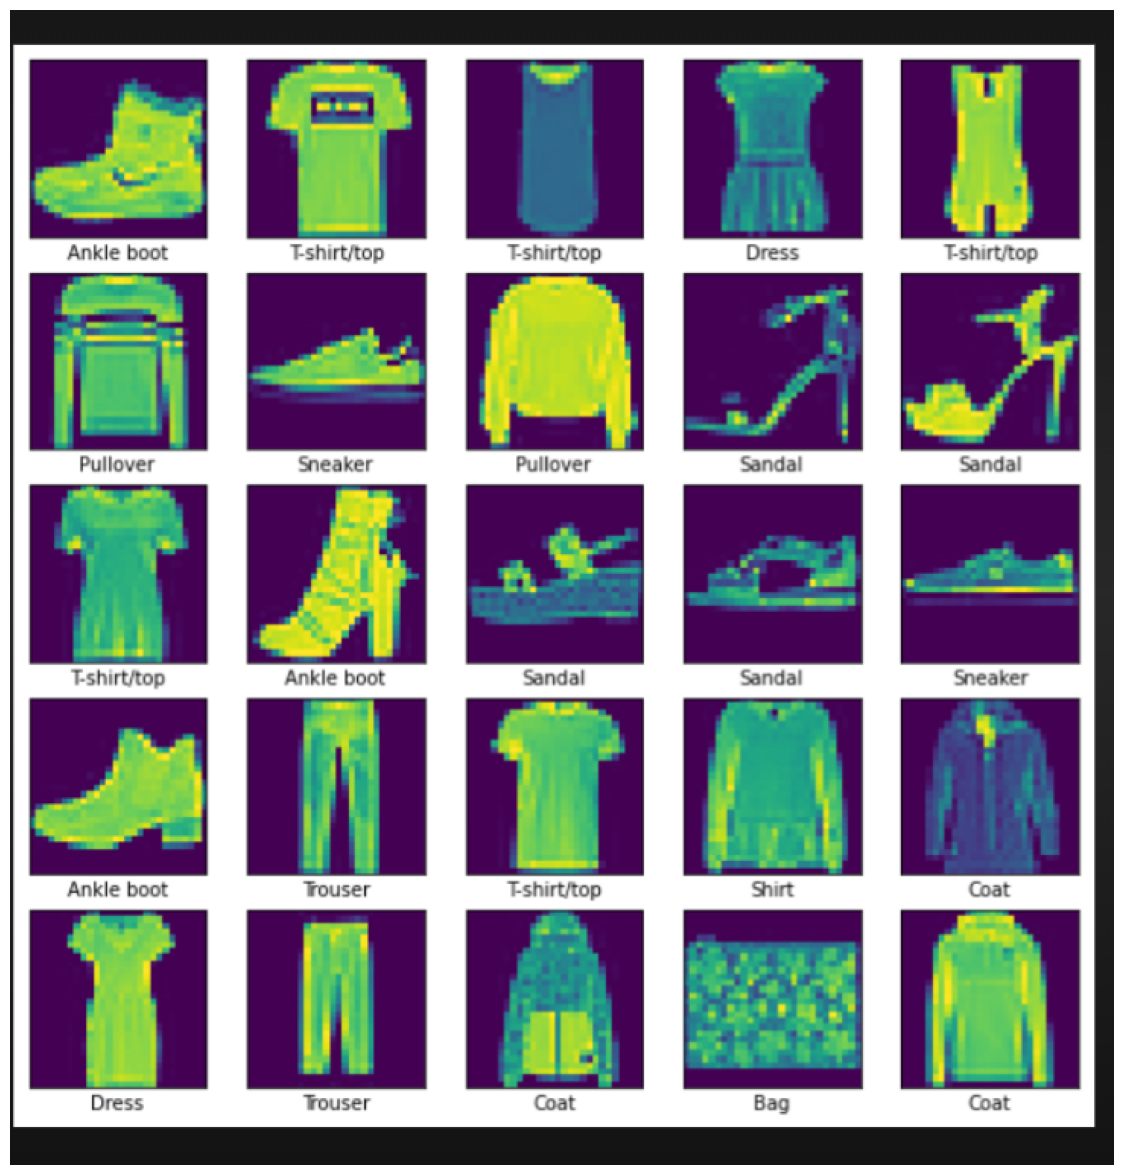

In [48]:
from PIL import Image
import matplotlib.pyplot as plt

# Absolute path to your image file
image_path = 'C:\\Users\\FAST LAPTOP\\Documents\\Deep Learning\\CPU GPU Performance test with Image classifications\\thumbnail.png'

try:
    # Load an image from a file
    image = Image.open(image_path)

    # Create a figure with a specified size
    plt.figure(figsize=(15, 15))  # You can adjust the size here (width, height)

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Turn off the axis
    plt.show()
except FileNotFoundError:
    print(f"File not found: {image_path}")


<H1 align="center">Feshion MnIst DataSet for Classification of Small Image With CPU & GPU Performance</H1>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras 

In [87]:
# Load the FashionMNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 85s 3us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 19s 4us/step


In [88]:
len(x_train)

60000

In [280]:
len(y_train)

60000

In [404]:
def sample_plot(index):
    plt.figure(figsize=(6,6))
    plt.imshow(x_train[index])

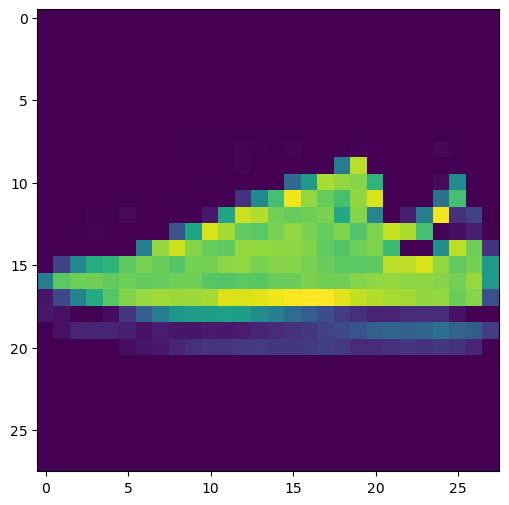

In [507]:
sample_plot(6)

In [408]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for index, class_name in enumerate(classes):
    print(f"Class {index}: {class_name}")

Class 0: T-shirt/top
Class 1: Trouser
Class 2: Pullover
Class 3: Dress
Class 4: Coat
Class 5: Sandal
Class 6: Shirt
Class 7: Sneaker
Class 8: Bag
Class 9: Ankle boot


In [410]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [411]:
x_train=x_train/255
x_test=x_test/255

In [413]:
y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10)
y_test_categorical=keras.utils.to_categorical(y_test,num_classes=10)

In [414]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [416]:
x_train[0].shape

(28, 28)

In [417]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,)),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer="SGD",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [418]:
model.fit(x_train_scaled, y_train_categorical, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7193 - loss: 0.9172


In [421]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8167 - loss: 0.5480


[0.5545254349708557, 0.8138999938964844]

In [423]:
np.argmax(model.predict(x_test_scaled))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


49868

In [424]:
def get_model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,)),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])
    model.compile(
    optimizer="SGD",
    loss="categorical_crossentropy",
    metrics=['accuracy']
    )
    return model
    

In [426]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model_test=get_model()
    model_test.fit(x_train_scaled, y_train_categorical, epochs=1)
    

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7212 - loss: 0.9207
10.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [427]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model_test=get_model()
    model_test.fit(x_train_scaled, y_train_categorical, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7142 - loss: 0.9225
9.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [428]:
np.argmax(model.predict(x_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


49868

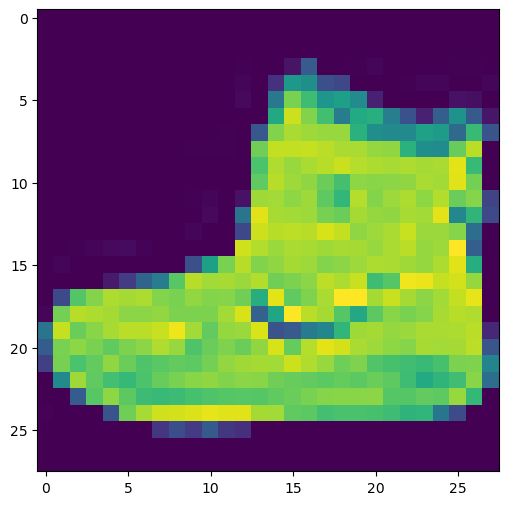

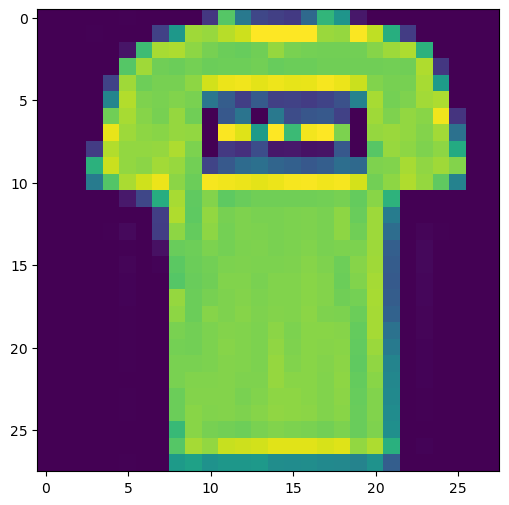

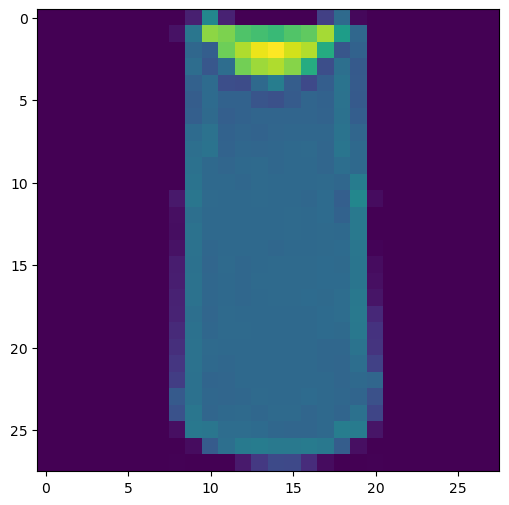

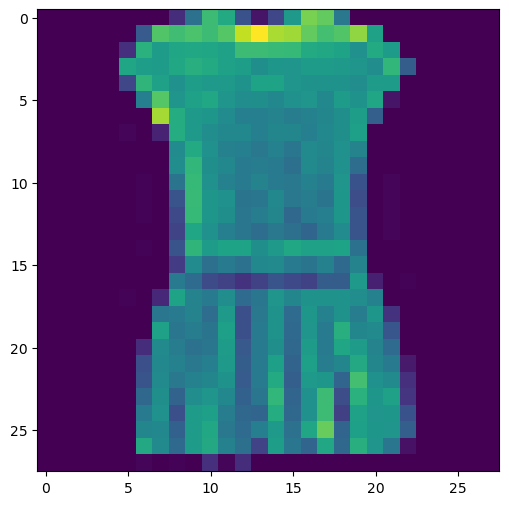

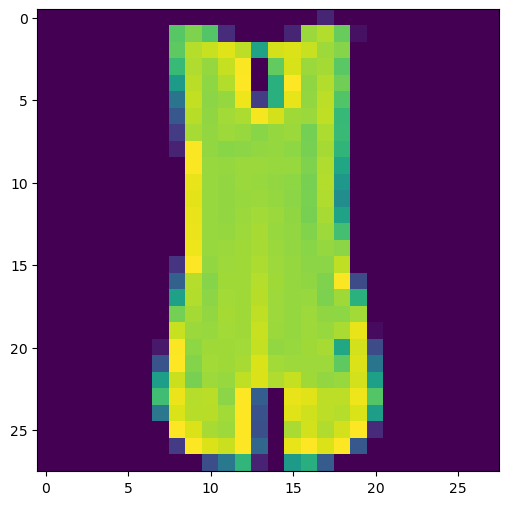

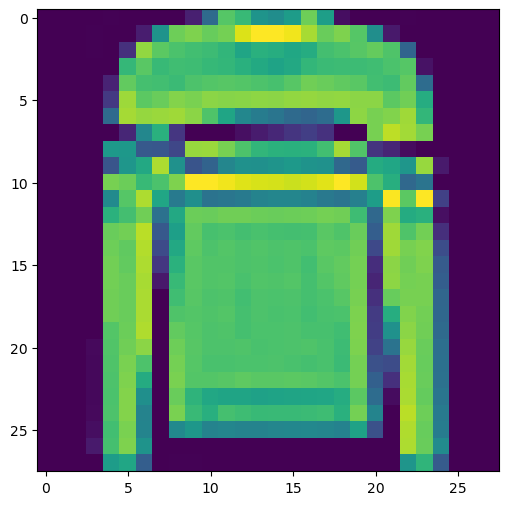

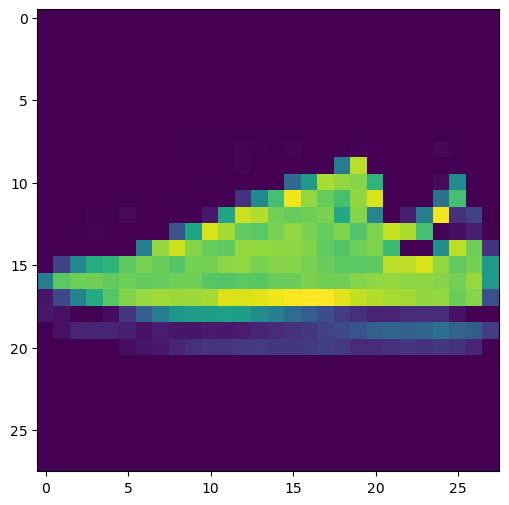

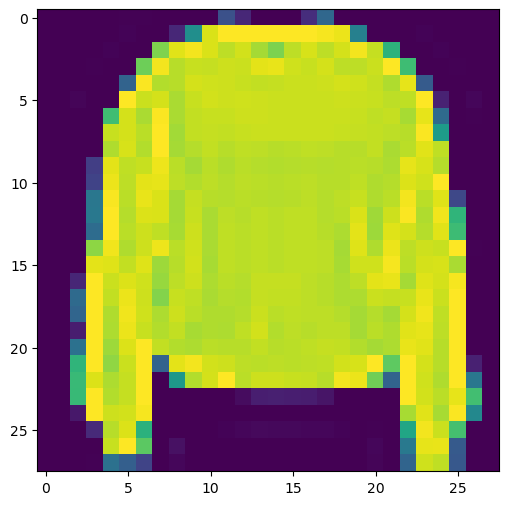

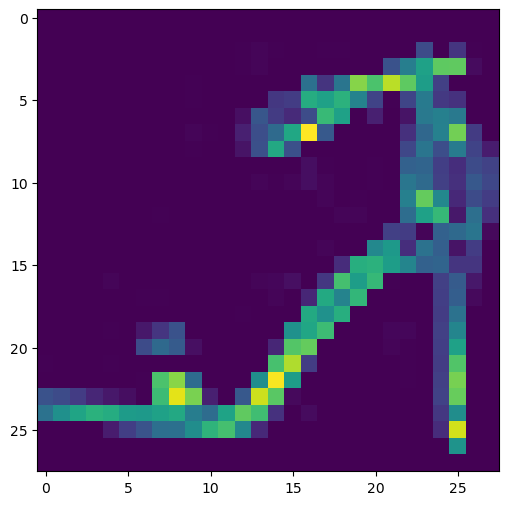

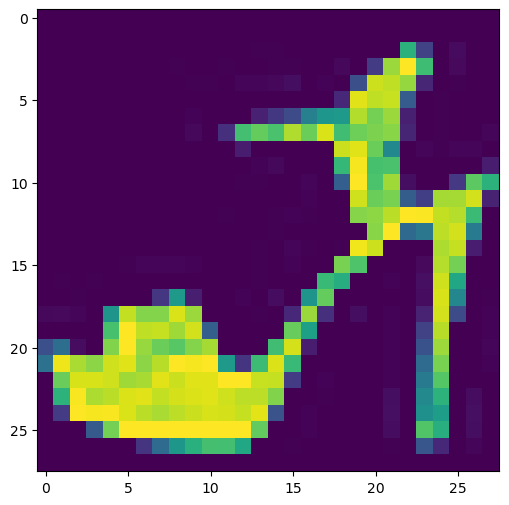

In [448]:
for i in range(10):
    sample_plot(i)